In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head(1)

,title,year
0,The Rising Son,1990


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [45]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
g = c.groupby(['year','character']).size()
sy = g.unstack('character', fill_value=0)
sy = sy[sy.Superman > sy.Batman]
len(sy)

13

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [46]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
g = c.groupby(['year','character']).size()
sy = g.unstack('character', fill_value=0)
sy = sy[sy.Superman < sy.Batman]
len(sy)

24

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

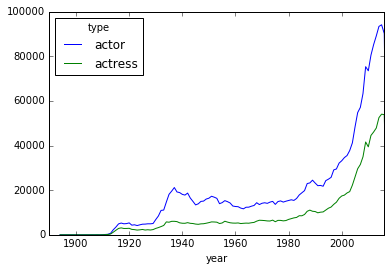

In [60]:
c = cast
g = c.groupby(['year','type']).size()
#g = g.unstack('type', fill_value = 0)
g = g.unstack('type').fillna(0)
g.plot(xlim=[1890,2016])

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

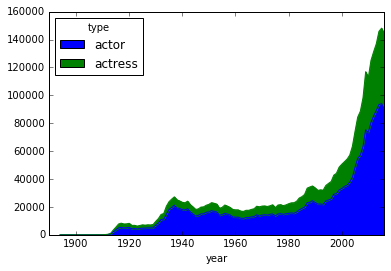

In [61]:
c = cast
g = c.groupby(['year','type']).size()
g = g.unstack('type').fillna(0)
g.plot(xlim=[1890,2016], kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

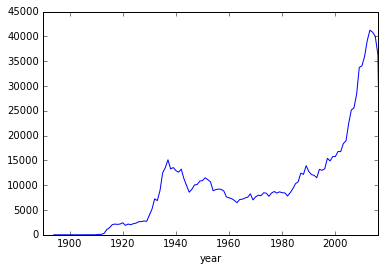

In [68]:
c = cast
g = c.groupby(['year','type']).size()
g = g.unstack('type').fillna(0)
g = g.actor-g.actress
g.plot(xlim=[1890,2016])

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

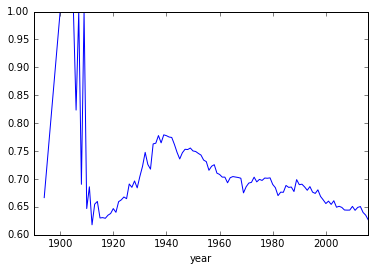

In [69]:
c = cast
g = c.groupby(['year','type']).size()
g = g.unstack('type').fillna(0)
g = g.actor/(g.actor+g.actress)
g.plot(xlim=[1890,2016])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

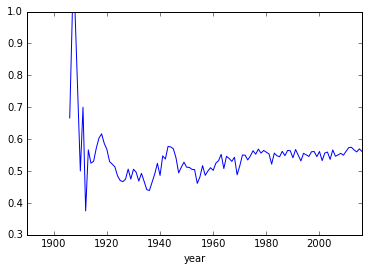

In [72]:
c = cast
c = c[c.n==2]
g = c.groupby(['year','type']).size()
g = g.unstack('type').fillna(0)
g = g.actor/(g.actor+g.actress)
g.plot(xlim=[1890,2016])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

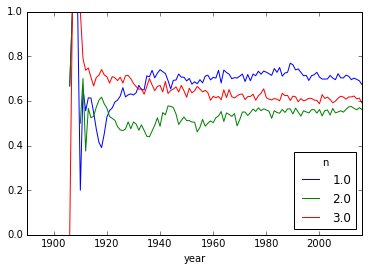

In [116]:
c = cast
c = c[c.n<=3]
g = c.groupby(['year','type','n']).size()
g = g.unstack('type').fillna(0)
g = (g.actor/(g.actor+g.actress))
g = g.unstack('n')
g.plot(xlim=[1890,2016])